In [1]:
%pylab inline
from scipy import special,optimize
import random 
import scipy
from random import getrandbits 

Populating the interactive namespace from numpy and matplotlib


# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing heads, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by: 
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$


If the average the number of heads is denoted $M_n\equiv M/n$, then clearly $0\le M_n \le 1$ and we expect that $M_{n\rightarrow \infty} = p$. For $M_n$ being in the range $(x,y)$, we have: 
$$ Prob(x<M_n<y) = \sum_{r \in \mathcal Z~\wedge~x<\frac{r}{n}<y} P(r;n) $$



## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian.

In [2]:
def Task1_1(n):
    xv, Pv = [], []
    for i in range(1,n+1):
        xv.append(i/n)
        Pv.append(n*special.comb(n,i)*((0.5)**n))
    plot(xv,Pv, label = n)
    

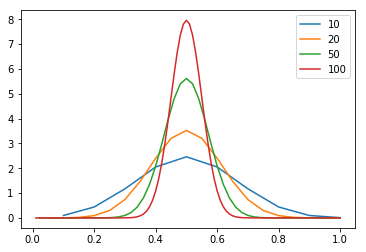

In [3]:
Task1_1(10)
Task1_1(20)
Task1_1(50)
Task1_1(100)
legend()

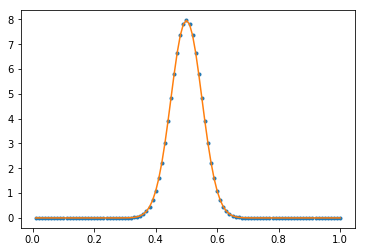

In [4]:
# Task- 1.2

n = 100
x_val, y_val = [], []
for i in range(1,n+1):
    x_val.append(i/n)
    y_val.append(n*special.comb(n,i)*((0.5)**n))
    
def gaussian_fun(x,mu,sigma,c):
    val = c*(e**((-1/2)*(((x-mu)/sigma)**2)))
    return val

popt, pcov = optimize.curve_fit(gaussian_fun,x_val,y_val,[1,1,1])

plot(x_val, gaussian_fun(x_val,*popt), ".")
plot(x_val, y_val)

## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$

Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

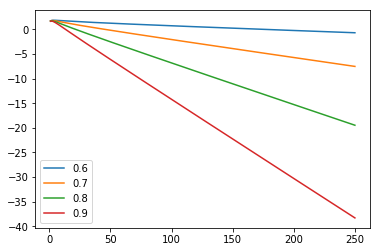

In [5]:
nv = linspace(1,250,250)
parts = 90       # change to change precision of the values calculated

def Task2(x,pre):
    global nv
    xv = linspace(x, 1, pre)
    yv = []
    for n in nv:
        yv.append(np.sum(n*special.comb(n,xv[:]*n)*((0.5)**n)))
    yv = log10(yv[:])
    return yv

plot(nv, Task2(0.6, parts), label = "0.6")
plot(nv, Task2(0.7, parts), label = "0.7")
plot(nv, Task2(0.8, parts), label = "0.8")
plot(nv, Task2(0.9, parts), label = "0.9")
legend()

## Task-3: 
Note that for large $N$, the above plots are linear. 
Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

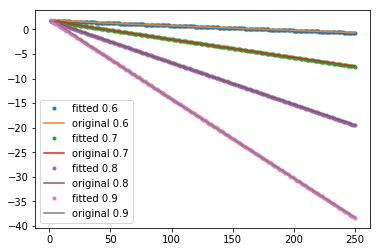

In [6]:
def line_eq(x, m, c):
    return m*x + c
xvals = [0.6,0.7,0.8,0.9]
list2 = []
for i in xvals:
    x_vals, y_vals = nv, Task2(i,90)
    c1, c2 = scipy.optimize.curve_fit(line_eq,x_vals,y_vals)
    plot(x_vals, line_eq(x_vals,*c1),'.',label = "fitted " + str(i))
    plot(x_vals, y_vals, label="original "+str(i))
legend()

## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by 
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$ 
with $x(0)=0$ and $c(t)$ is the coin toss at time $t$, with two possible outcomes heads ($H$) or tails ($T$).

Plot a one realisation of $x(t)$ for $t\in[0,100]$


Text(0.5,0,'t -->')

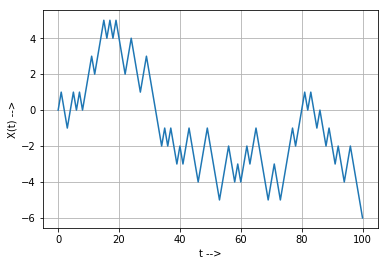

In [7]:
def Task4():
    global Xt
    Xt = [0]
    for t in range(100):
        if(bool(getrandbits(1))):
            Xt.append(Xt[-1] + 1)
        else:
            Xt.append(Xt[-1] - 1)
    return Xt

plot(Task4())
grid()
ylabel("X(t) -->")
xlabel("t -->")

## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$? 
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

### 1. <x(t)> vs t

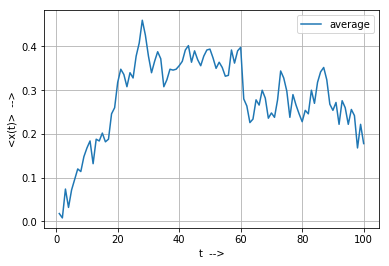

In [8]:
yvals = np.zeros(100)
xvals = numpy.array(range(1,101))
for i in range(1000):
    tempvals = numpy.random.randint(0,2,100)
    temp = 0
    k = 0;
    for j in tempvals:
        if j == 1:
            temp += 1
        elif j == 0:
            temp -= 1
        yvals[k] += temp
        k += 1
yvals = yvals/1000
plot(xvals,yvals,label='average')
legend()
ylabel('<x(t)>  -->')
xlabel('t  -->')
grid()

### 2. <x^2(t)> vs t

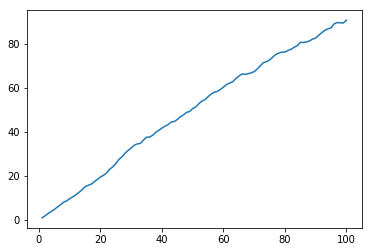

In [9]:
yvals = np.zeros(100)
xvals = numpy.array(range(1,101))
for i in range(1000):
    tempvals = numpy.random.randint(0,2,100)
    temp = 0
    k = 0;
    for j in tempvals:
        if j == 1:
            temp += 1
        elif j == 0:
            temp -= 1
        yvals[k] += temp**2
        k += 1
yvals = yvals/1000
plot(xvals,yvals)

### 3. 'error' of the calculation

## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imagine that $x=M$ is the location of jail, where once the 'drunk' random walker reaches, is trapped for ever. 

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$. 

Compute $y_M(t)$ by generating a sample of random walks. Comment.

In [10]:
def randomwalkwithtrap(sink):
    list1 = numpy.random.binomial(1,0.5,1000)
    list2 = []
    temp = 0
    test = 0
    for i in list1:
        if i == 1 and test == 0:
            temp += 1
        elif i == 0 and test == 0:
            temp -= 1
            
        if temp>=sink:
            test = 1
            
        if test==1:
            list2.append(1)
        else:
            list2.append(0)
    return list2

Text(0.5,0,'t -->')

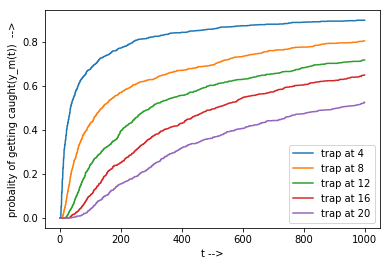

In [11]:
xvals = arange(1,1001,1)
trapvals = arange(4,21,4)
for j in trapvals:
    finallist = np.zeros(1000)
    for i in range(1000):
        finallist += randomwalkwithtrap(j)
    finallist
    plot(xvals, finallist/1000, label="trap at "+str(j))
legend()
ylabel('probality of getting caught(y_m(t))  -->')
xlabel('t -->')

## Task-7: What is the relationship between the result in Task-2 for `Coin Toss problem` and the rate of reaching the trap in Task-6 for `Random walk with a trap` problem